# Business Objective:
   The goal of Object detection is to recognize instances of a predefined set of **Object Classes** and describe the locations of each detected object in the image using **bounding boxes**

_______________________________________________________________________________________________________________________________

   # Object Detection
   *  Object detection, in simple terms, is a method that is used to **recognize and detect different objects** present in an **image or video** and label them to **classify** these objects.

* In this we use **OpenCv** to load already pre-trained frozen **Tensorflow Models**
* **OpenCv** - Open source **computer vision Library**, designed to solve computer vision problems, machine learning, and image processing

______________________________________________________________________________________________________________________________


## Difference Between Image Classification and Object detection

### > Image Classification:
   * Image Classification helps us to classify what is contained in an image
   * Classifies the image to which category it belongs to

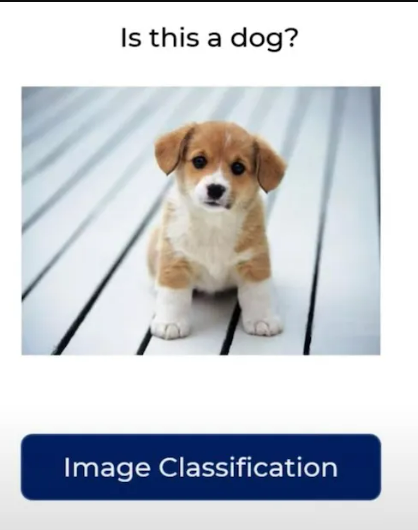

**Deep learning Algorithms for image classification**
* AlexNet
* GoogleNet
* MobileNet
* VGNet

**Famous Dataset for image classification is** 
* Imagenet (1000 classes)

_______________________________________________________________________________________________________________________________

## >Object Detection:

* Object detection specifies the location of multiple objects in the image
* It involes two steps
 1. Classification
 2. Localization

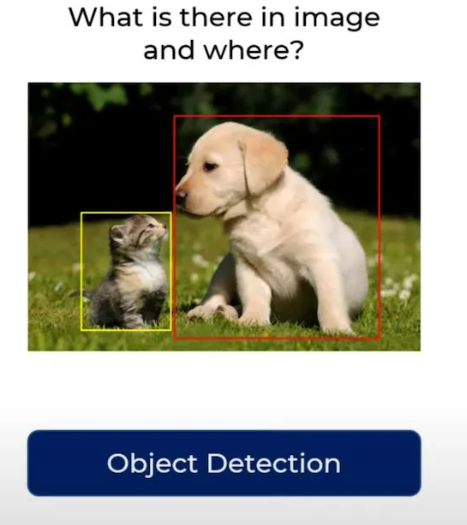

### Deep learning Algorithms for object detection are
* **SSD-MobileNetv2, SSD-MobileNetv3(SSD-single shot multibox detector)**
>mobileNet(Is a neural network for Imageclassification & REcognition)
SSD-MobileNet(Object detection)
* **YOLO v1,v2,v3**

### Famous Dataset for object detection is
* coco (80 classes)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Import Necessary Libraries

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pb.txt'
frozen_model='frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classlables=[]                                               #empty list
file_name='coco.names.txt'                                   #file
with open(file_name,'rt') as fpt:                            #opening the file
    classlables=fpt.read().rstrip('\n').split('\n')          #appending the file to the created list
    

In [5]:
print(classlables)  #pre defined names list

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlables))

80


## Read an Image

In [7]:
img = cv2.imread('charminar.jpeg')
img

array([[[234, 207, 186],
        [234, 207, 186],
        [234, 207, 186],
        ...,
        [236, 224, 212],
        [236, 224, 212],
        [236, 224, 212]],

       [[234, 207, 186],
        [234, 207, 186],
        [234, 207, 186],
        ...,
        [236, 224, 212],
        [236, 224, 212],
        [236, 224, 212]],

       [[234, 207, 186],
        [234, 207, 186],
        [234, 207, 186],
        ...,
        [236, 224, 212],
        [236, 224, 212],
        [236, 224, 212]],

       ...,

       [[ 89,  86,  88],
        [ 89,  86,  88],
        [ 90,  87,  89],
        ...,
        [ 80,  83,  91],
        [ 80,  83,  91],
        [ 79,  82,  90]],

       [[ 87,  84,  86],
        [ 87,  84,  86],
        [ 87,  84,  86],
        ...,
        [ 84,  87,  95],
        [ 84,  87,  95],
        [ 83,  86,  94]],

       [[ 86,  83,  85],
        [ 86,  83,  85],
        [ 87,  84,  86],
        ...,
        [ 90,  93, 101],
        [ 90,  93, 101],
        [ 90,  93, 101]]

In [8]:
img.shape
#(length, breadth, channels)

(1068, 1600, 3)

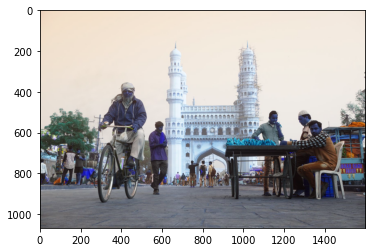

In [9]:
plt.imshow(img) #bgr

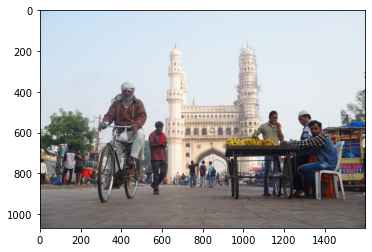

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #converted bgr image to rgb

In [11]:
model.setInputSize(146,146)                  #the size of image in conf file
model.setInputScale(1.0/127.5)                # For 8-bits images, and the 256 gray levels are in the scale of integers [0, …, 255].
model.setInputMean((127.5,127.5,127.5))             # 255/2 = 127.5
model.setInputSwapRB(True)

< cv2.dnn.Model 00000232F8E62530>

In [12]:
classIndex ,confidence,bbox = model.detect(img,confThreshold=0.5)

In [13]:
classIndex

array([1, 1, 1])

In [14]:
confidence

array([0.55238646, 0.52975386, 0.50067407], dtype=float32)

In [15]:
bbox

array([[1274,  593,  180,  357],
       [ 378,  399,  287,  581],
       [ 846,  749,   69,  135]])

In [16]:
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),7)
    cv2.putText(img,classlables[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale, color=(0,255,0),thickness=4)


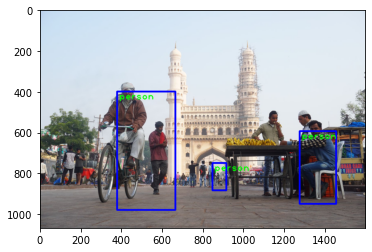

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Objects has been detected in the image